# Assignment 1

In [1]:
# Please set PUI2016_Python3 kernel for this notebook

import pandas as pd
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
try:
    from StringIO import BytesIO as io
except ImportError:
    from io import BytesIO as io
try:
    from urllib import urlencode as urlencode
except ImportError:
    from urllib.parse import urlencode as urlencode
try:
    from urllib import urlopen as urlopen
except ImportError:
    from urllib.request import urlopen as urlopen
try:
    from urllib2 import HTTPError as HTTPError
except ImportError:
    from urllib.error import HTTPError as HTTPError

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
API_URL = 'https://fb55.carto.com:443/api/v2/sql?q=select'

def queryCartoDB(query, formatting = 'CSV', source = API_URL):
    '''queries carto datasets from a given carto account
    Arguments: 
    query - string: a valid sql query string
    format - outlut format  OPTIONAL (default CSV)
    source - a valid sql api endpoint OPTIONAL (default carto fb55 account)
    Returns:
    the return of the sql query AS A STRING
    NOTES:
    designed for the carto API, tested only with CSV return format'''
    
    
    data = urlencode({'format': formatting, 'q': query}).encode("utf-8")
    try:
        response = urlopen(source, data)
        return response.read()
    except HTTPError as e:
        raise (ValueError('\n'.join(ast.literal_eval(e.readline())['error'])))
        
def get_data(query):
    try:
        return pd.read_csv(io(queryCartoDB(query)), sep = ',')
    except ValueError as v:
        print (str(v))

In [3]:
query = '''SELECT * FROM fb55.acs15; '''
pumaUnemploymentAll = get_data(query)
pumaUnemploymentAll.head()

,the_geom,c23002g_014e,the_geom_webmercator,c23002g_002e,public_use_microdata_area,c23002g_001e,c23002g_004e,c23002g_003e,c23002g_009e,c23002g_006e,...,c23002g_018e,c23002g_017e,c23002g_020e,c23002g_022e,c23002g_021e,c23002g_024e,c23002g_023e,c23002g_026e,c23002g_025e,c23002g_027e
0,NaN,10,NaN,622,100,1304,235,612,377,235,...,0,271,192,363,79,0,48,0,0,48
1,NaN,59,NaN,1161,200,1782,655,1085,430,655,...,0,357,283,227,74,5,37,0,5,32
2,NaN,62,NaN,491,300,1066,223,425,202,223,...,0,286,244,233,42,5,56,0,5,51
3,NaN,38,NaN,402,401,724,265,359,94,265,...,0,182,159,88,23,0,52,0,0,52
4,NaN,43,NaN,1253,402,2476,572,1202,630,572,...,0,819,695,344,124,0,60,0,0,60


In [7]:
"""
unemployed males (17-64 years old)= 'C23002G_008E'
unemployed females (17-64 years old) = 'C23002G_021E'
total surveyed population (17-64 years old) = 'C23002G_001E'
"""
pumaUnemployment = pumaUnemploymentAll[['c23002g_008e', 'c23002g_021e', 'c23002g_001e']]
pumaUnemployment["unemployed"] = pumaUnemployment['c23002g_008e'] + pumaUnemployment['c23002g_021e']
pumaUnemployment.rename(columns={"c23002g_008e": "unemployed males", 
                                 "c23002g_021e": "unemployed females", 
                                 "c23002g_001e": "total"}, inplace=True)
pumaUnemployment = pumaUnemployment[['unemployed', 'total']]
pumaUnemployment.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,unemployed,total
0,154,1304
1,215,1782
2,92,1066
3,85,724
4,207,2476


Text(0,0.5,'Unemployed population(17-64 years old)')

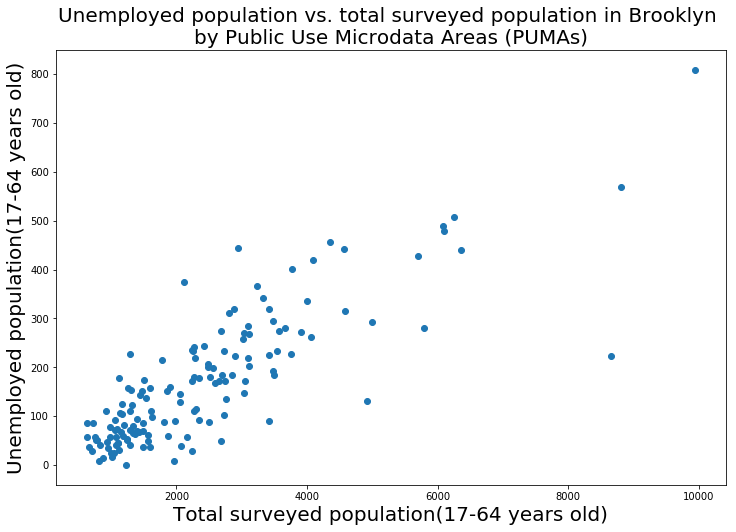

In [35]:
figure = plt.figure(figsize=(12, 8))
plt.scatter(pumaUnemployment["total"], pumaUnemployment["unemployed"])
plt.title("Unemployed population vs. total surveyed population in Brooklyn \nby Public Use Microdata Areas (PUMAs)", 
         fontsize=20)
plt.xlabel("Total surveyed population(17-64 years old)", fontsize=20)
plt.ylabel("Unemployed population(17-64 years old)", fontsize=20)

#### Figure 1: Unemployed population vs. total surveyed population in Brooklyn by PUMAs. The plot indicates there might be postive correlation bewtween the unemployed population and total surveyed population.